# Лабораторная работа №2.
Выполнил: студент группы ИДМ-24-07 Туркин Александр.

# Задание
Решить численно волновое уравнение

$$
\frac{\partial^2 u}{\partial t^2} = a^2 \frac{\partial^2 u}{\partial x^2}
$$

Начальное условие

$$
U(x, 0) = 0.2 (1 - x) \sin \pi x
$$

Граничные условия

$$
\frac{\partial U(x, 0)}{\partial t} = \varphi_1(x)
$$

$$
U(0, t) = \varphi_2(x)
$$

$$
U(1, t) = \varphi_3(x)
$$

<center>Задание</center>

1. Написать решение волнового уравнения, используя явную схему, принять $a^2 = 1$, $\varphi_1(x) = \varphi_2(x) = \varphi_3(x) = 0$  

2. Исследовать влияние параметра $a$, а также ненулевых $\varphi_i(x)$ на решение уравнения

# Решение

Рассмотрим волновое уравнение с начальными и граничными условиями:

$$
\frac{\partial^2 u}{\partial t^2} = a^2 \frac{\partial^2 u}{\partial x^2}
$$

Начальное условие:

$$
U(x, 0) = 0.2 (1 - x) \sin(\pi x)
$$

Граничные условия:

$$
\frac{\partial U(x, 0)}{\partial t} = 0
$$

$$
U(0, t) = 0
$$

$$
U(1, t) = 0
$$

С учётом того, что $ a^2 = 1 $, получаем схему:

1. Пространственная и временная сетки: выберем шаги $ \Delta x $ и $ \Delta t $, соответствующие сеточным точкам $ x_i = i \cdot \Delta x $ и $ t_n = n \cdot \Delta t $.
2. Явная схема:
   $$
   u_i^{n+1} = 2u_i^n - u_i^{n-1} + \frac{(\Delta t)^2}{(\Delta x)^2} \left( u_{i+1}^n - 2u_i^n + u_{i-1}^n \right)
   $$
3. Начальные условия:
   $$
   u_i^0 = U(x_i, 0), \quad u_i^1 = u_i^0 + \Delta t \cdot \frac{\partial U}{\partial t}(x_i, 0) \approx u_i^0
   $$

Теперь перейдём к реализации на Python.

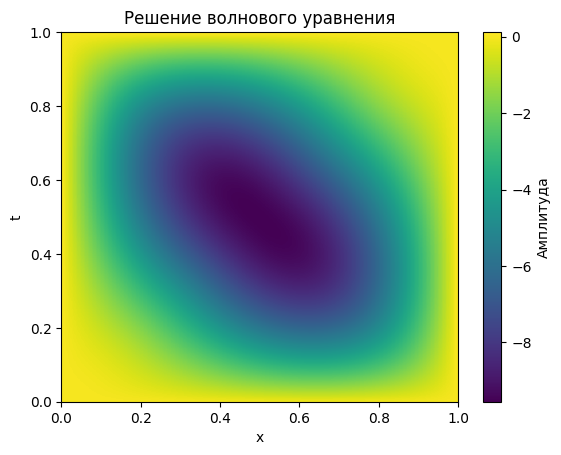

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сетки
L = 1.0            # Длина отрезка по x
T = 1.0            # Время моделирования
Nx = 100           # Число шагов по x
Nt = 300           # Число шагов по t
dx = L / Nx        # Шаг по x
dt = T / Nt        # Шаг по t
c = 1.0            # Скорость волны (a^2 = 1)

# Проверка на устойчивость
assert dt <= dx / c, "Нарушено условие Куранта для устойчивости схемы"

# Начальные условия
x = np.linspace(0, L, Nx+1)
u = np.zeros((Nt+1, Nx+1))
u[0, :] = 0.2 * (1 - x) * np.sin(np.pi * x)  # U(x, 0)

# Граничные условия
u[:, 0] = 0
u[:, Nx] = 0

# Вычисление решения на каждом временном шаге
for n in range(1, Nt):
    for i in range(1, Nx):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + (c * dt / dx)**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])

# Визуализация результата
plt.imshow(u, extent=[0, L, 0, T], aspect='auto', cmap='viridis')
plt.colorbar(label='Амплитуда')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Решение волнового уравнения')
plt.show()

### Влияние параметра $ a $ и нулевых $ \varphi_i(x) $

1. **Параметр $ a $**:
   - Параметр $ a $ определяет скорость распространения волны. Чем больше $ a $, тем быстрее распространяется волна вдоль оси $ x $. В данном случае $ a^2 = 1 $, что упрощает уравнение и позволяет использовать стандартное соотношение между $ \Delta t $ и $ \Delta x $ для устойчивости схемы.
   
2. **Нулевые граничные условия $ \varphi_i(x) $**:
   - Нулевые граничные условия (все $ \varphi_i(x) = 0 $) означают, что волна затухает на границах, создавая эффект фиксированных концов, препятствующих распространению волны за границы $ x = 0 $ и $ x = 1 $. Эти условия определяют отражение волны от границ и её затухание во времени.